In [75]:
%load_ext autoreload
%autoreload 2
import numpy as np

import time
from autoemulate.datasets import fetch_data
from autoemulate.compare import AutoEmulate
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# gp-like data

In [76]:
def make_gp_data(n_points, x_range=(0, 10), num_basis=20, length_scale=0.5, noise_std=0.1):
    def simple_gp_like_function(x):
        centers = np.random.uniform(x_range[0], x_range[1], num_basis)
        weights = np.random.randn(num_basis)
        dist = np.abs(x[:, np.newaxis] - centers)
        rbf = np.exp(-(dist**2) / (2 * length_scale**2))
        return rbf.dot(weights)
    X = np.random.uniform(x_range[0], x_range[1], n_points)
    y = simple_gp_like_function(X) + np.random.normal(0, noise_std, n_points)
    
    return X.reshape(-1, 1), y

# Generate data
n_points = 400
X, y = make_gp_data(n_points)

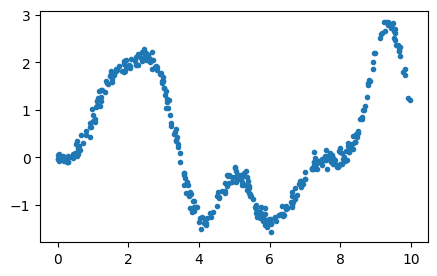

In [77]:
plt.figure(figsize=(5, 3))  # Set a smaller figure size
plt.plot(X, y, ".")

In [78]:
em = AutoEmulate()
em.setup(X, y, print_setup=False)
em.compare()
em.print_results()

Initializing:   0%|          | 0/8 [00:00<?, ?it/s]

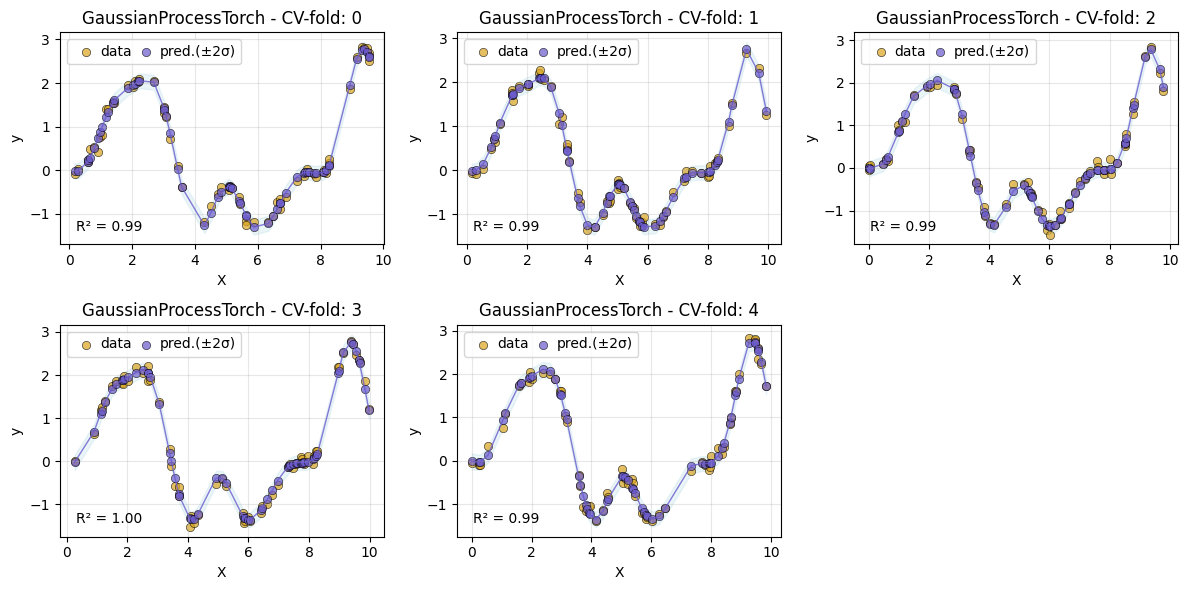

In [81]:
em.plot_results(model="gpt")

# Difficult-for GP data

In [71]:
def generate_challenging_data(n_samples=1000, noise_level=0.01):
    """
    Generate X, y data that's challenging for a Gaussian Process to fit.
    
    Parameters:
    n_samples (int): Number of samples to generate
    noise_level (float): Standard deviation of Gaussian noise to add
    
    Returns:
    X (np.array): 2D array of shape (n_samples, 1)
    y (np.array): 2D array of shape (n_samples, 1)
    """
    X = np.linspace(0, 10, n_samples).reshape(-1, 1)
    y = np.zeros((n_samples, 1))
    
    # Create a function with abrupt changes and discontinuities
    y = np.where(X < 2, np.sin(2 * np.pi * X), y)
    y = np.where((X >= 2) & (X < 4), 2 * np.exp(-((X - 3)**2)), y)
    y = np.where((X >= 4) & (X < 6), -1.5 * np.ones_like(X), y)
    y = np.where((X >= 6) & (X < 8), 0.5 * np.cos(3 * np.pi * (X - 7)), y)
    y = np.where(X >= 8, np.abs(X - 9), y)
    
    # Add some high-frequency oscillations
    y += 0.05 * np.sin(20 * np.pi * X)
    # Add Gaussian noise
    y += np.random.normal(0, noise_level, (n_samples, 1))
    
    return X, y

X, y = generate_challenging_data(n_samples=600, noise_level=0.0)

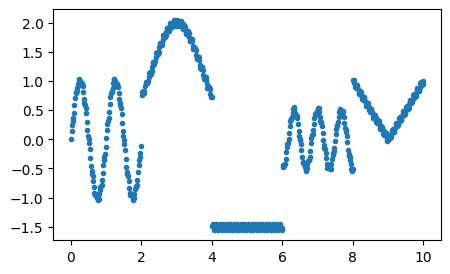

In [72]:
plt.figure(figsize=(5, 3))  # Set a smaller figure size
plt.plot(X, y, ".")

In [73]:
em = AutoEmulate()
em.setup(X, y, print_setup=False)
em.compare()
em.print_results()

Initializing:   0%|          | 0/8 [00:00<?, ?it/s]

Multiple outputs detected. Plotting the output variable with index 0. 
To plot other outputs, set `output_index` argument to the desired index.


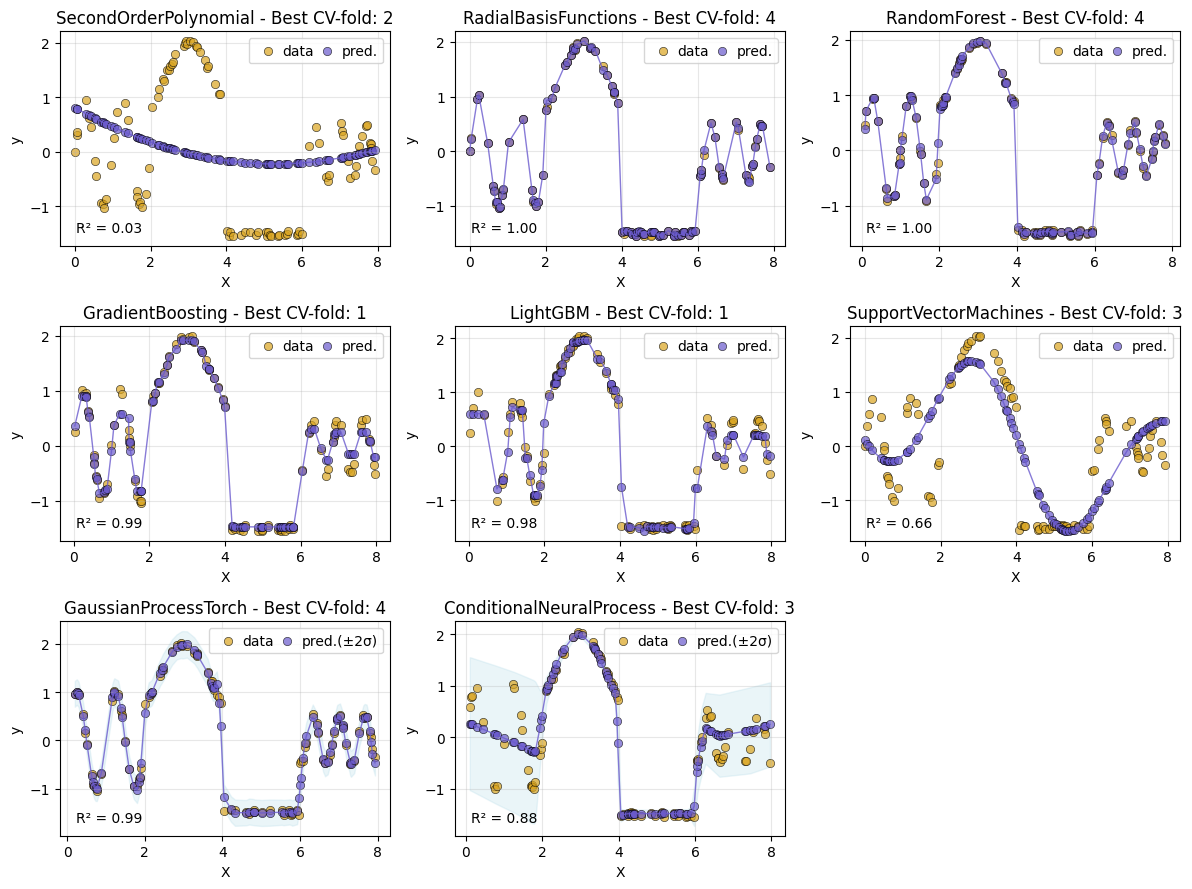

In [74]:
em.plot_results()

# 1. Projectile motion with drag

In [10]:
from autoemulate.simulations.projectile import simulate_projectile_multioutput
from autoemulate.experimental_design import LatinHypercube
lhd = LatinHypercube([(-5., 1.), (0., 1000.)])
X = lhd.sample(150)
y = np.array([simulate_projectile_multioutput(x) for x in X])

In [11]:
y.shape

(150, 2)

In [13]:
em = AutoEmulate()
em.setup(X, y, print_setup=False, model_subset=["gpt"])
em.compare()
em.print_results()

Initializing:   0%|          | 0/1 [00:00<?, ?it/s]

autoemulate - Failed to cross-validate GaussianProcessTorch
Traceback (most recent call last):
  File "/Users/mstoffel/turing/projects/autoemulate/autoemulate/cross_validate.py", line 48, in _run_cv
    cv_results = cross_validate(
                 ^^^^^^^^^^^^^^^
  File "/Users/mstoffel/Library/Caches/pypoetry/virtualenvs/autoemulate-_SyXUh_0-py3.11/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mstoffel/Library/Caches/pypoetry/virtualenvs/autoemulate-_SyXUh_0-py3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 450, in cross_validate
    _warn_or_raise_about_fit_failures(results, error_score)
  File "/Users/mstoffel/Library/Caches/pypoetry/virtualenvs/autoemulate-_SyXUh_0-py3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 536, in _warn_or_raise_about_fit_failures
    raise ValueError(all_fits_failed_messag

ValueError: Metric r2 not found. Available metrics are: []

Multiple outputs detected. Plotting the output variable with index 0. 
To plot other outputs, set `output_index` argument to the desired index.


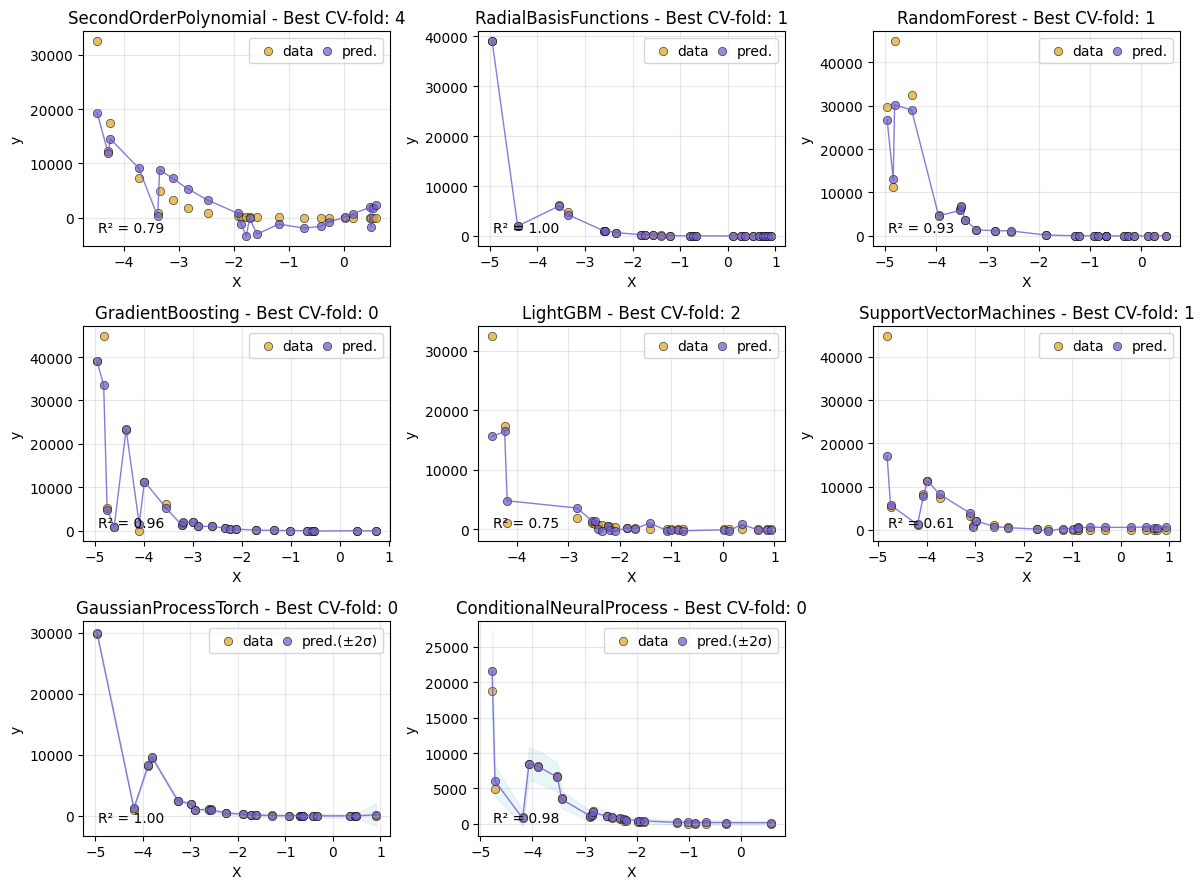

In [157]:
em.plot_results()

# 2. Cantilever beam

In [38]:
X, y = fetch_data('engineering1')
X.shape, y.shape

((994, 6), (994, 2))

In [47]:
em = AutoEmulate()
em.setup(X, y, print_setup=False, model_subset=["gpt"])
em.compare()
em.print_results()

Initializing:   0%|          | 0/1 [00:00<?, ?it/s]

[1.8781193e+01 4.7784770e+04]
[1.8612194e+01 4.7134180e+04]
[1.8852856e+01 4.8101375e+04]
[1.8888206e+01 4.8336816e+04]
[1.8542377e+01 4.8127363e+04]
[1.874338e+01 4.790887e+04]


Multiple outputs detected. Plotting the output variable with index 0. 
To plot other outputs, set `output_index` argument to the desired index.


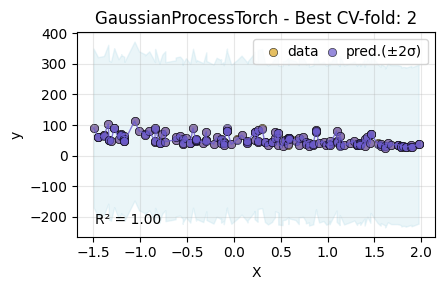

In [48]:
em.plot_results(output_index=0)

# 3. Atrial cell model

In [49]:
X, y = fetch_data('cardiac1')
X.shape, y.shape

((1350, 18), (1350, 4))

In [162]:
em = AutoEmulate()
em.setup(X, y, print_setup=False)
em.compare()
em.print_results()

Initializing:   0%|          | 0/8 [00:00<?, ?it/s]

Multiple outputs detected. Plotting the output variable with index 0. 
To plot other outputs, set `output_index` argument to the desired index.


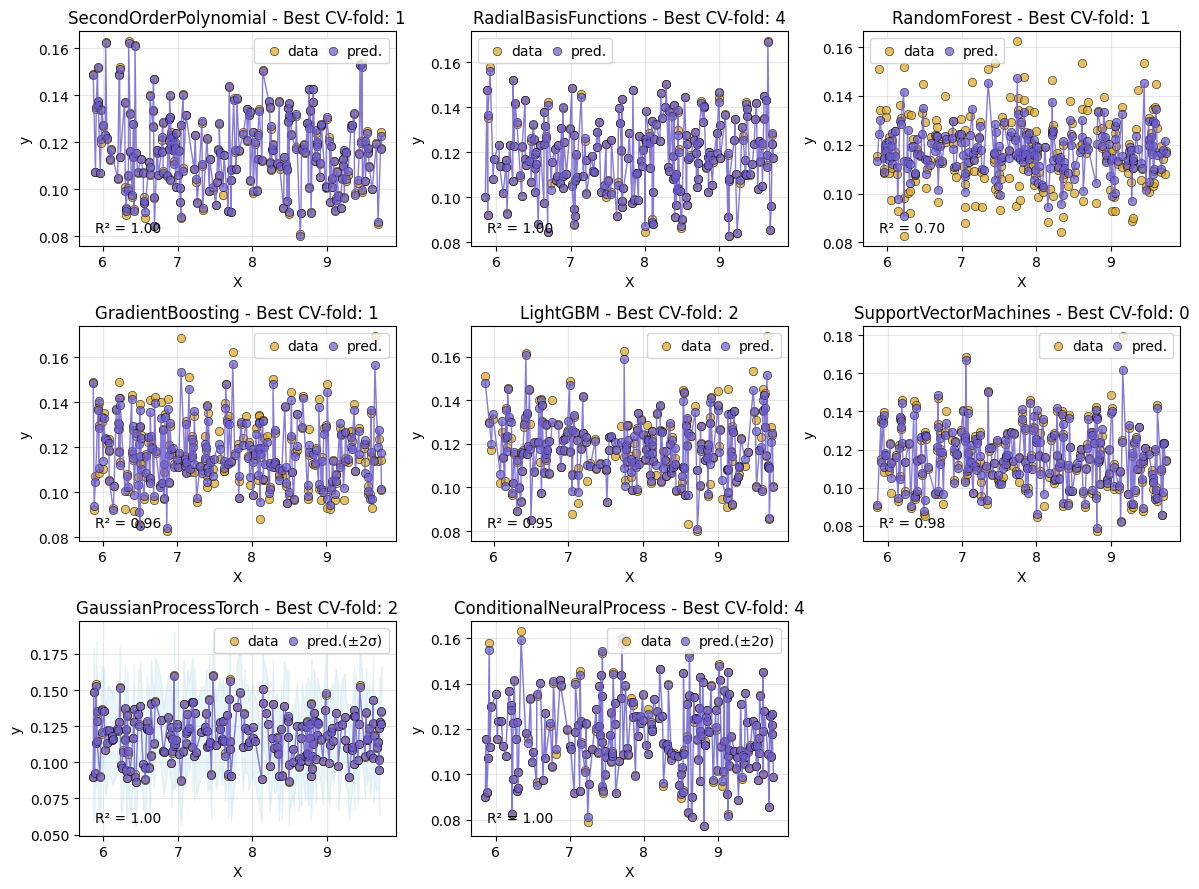

In [167]:
em.plot_results()

# 4. Isotonic contraction

In [169]:
X, y = fetch_data('cardiac2')
X.shape, y.shape

((1100, 27), (1100, 7))

In [171]:
em = AutoEmulate()
em.setup(X, y, print_setup=False)
em.compare()
em.print_results()

Initializing:   0%|          | 0/8 [00:00<?, ?it/s]

Multiple outputs detected. Plotting the output variable with index 0. 
To plot other outputs, set `output_index` argument to the desired index.


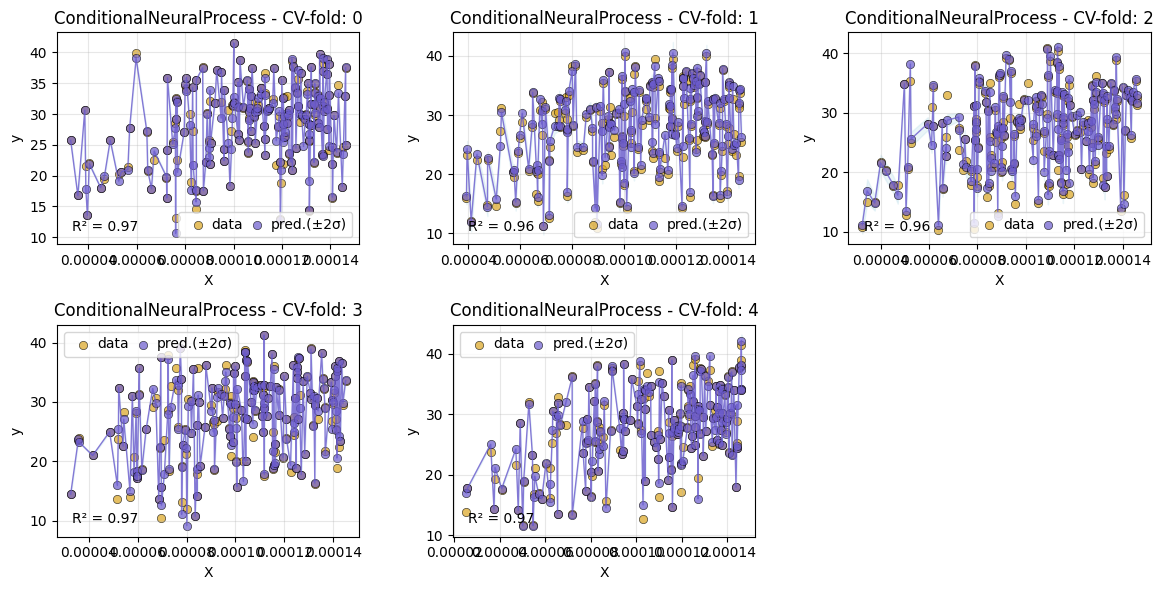

In [176]:
em.plot_results("cnp")

# 5. Circ Adapt Model

Initializing:   0%|          | 0/8 [00:00<?, ?it/s]

Multiple outputs detected. Plotting the output variable with index 0. 
To plot other outputs, set `output_index` argument to the desired index.


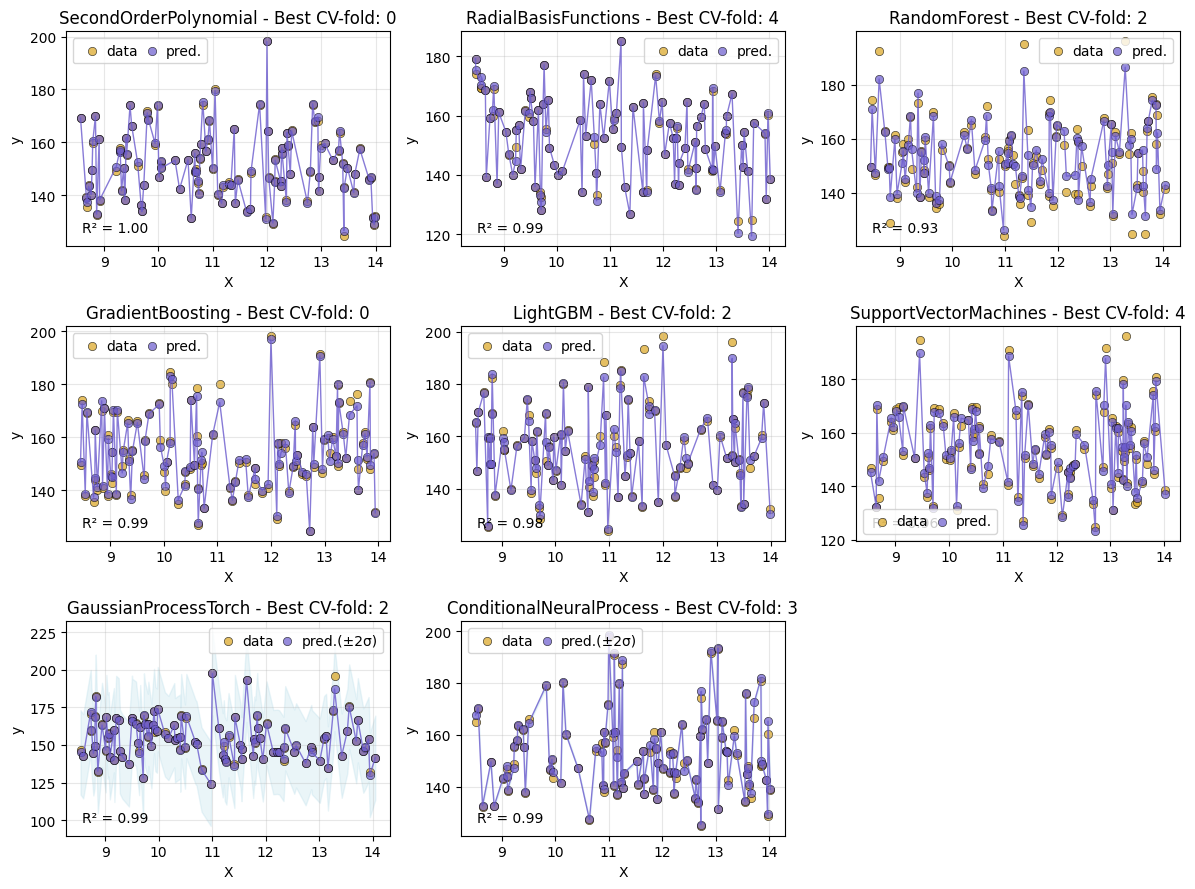

In [177]:
X, y = fetch_data('cardiac3')
X.shape, y.shape
em = AutoEmulate()
em.setup(X, y, print_setup=False)
em.compare()
em.print_results()
em.plot_results()

# 6. Four Chamber Model

In [180]:
X, y = fetch_data('cardiac4')
print(X.shape, y.shape)
em = AutoEmulate()
em.setup(X, y, print_setup=False, param_search=True, n_jobs=6)
em.compare()
em.print_results()

(407, 45) (407, 20)


Initializing:   0%|          | 0/8 [00:00<?, ?it/s]

In [178]:
X, y = fetch_data('cardiac4')
print(X.shape, y.shape)
em = AutoEmulate()
em.setup(X, y, print_setup=False)
em.compare()
em.print_results()

(407, 45) (407, 20)


Initializing:   0%|          | 0/8 [00:00<?, ?it/s]

Multiple outputs detected. Plotting the output variable with index 0. 
To plot other outputs, set `output_index` argument to the desired index.


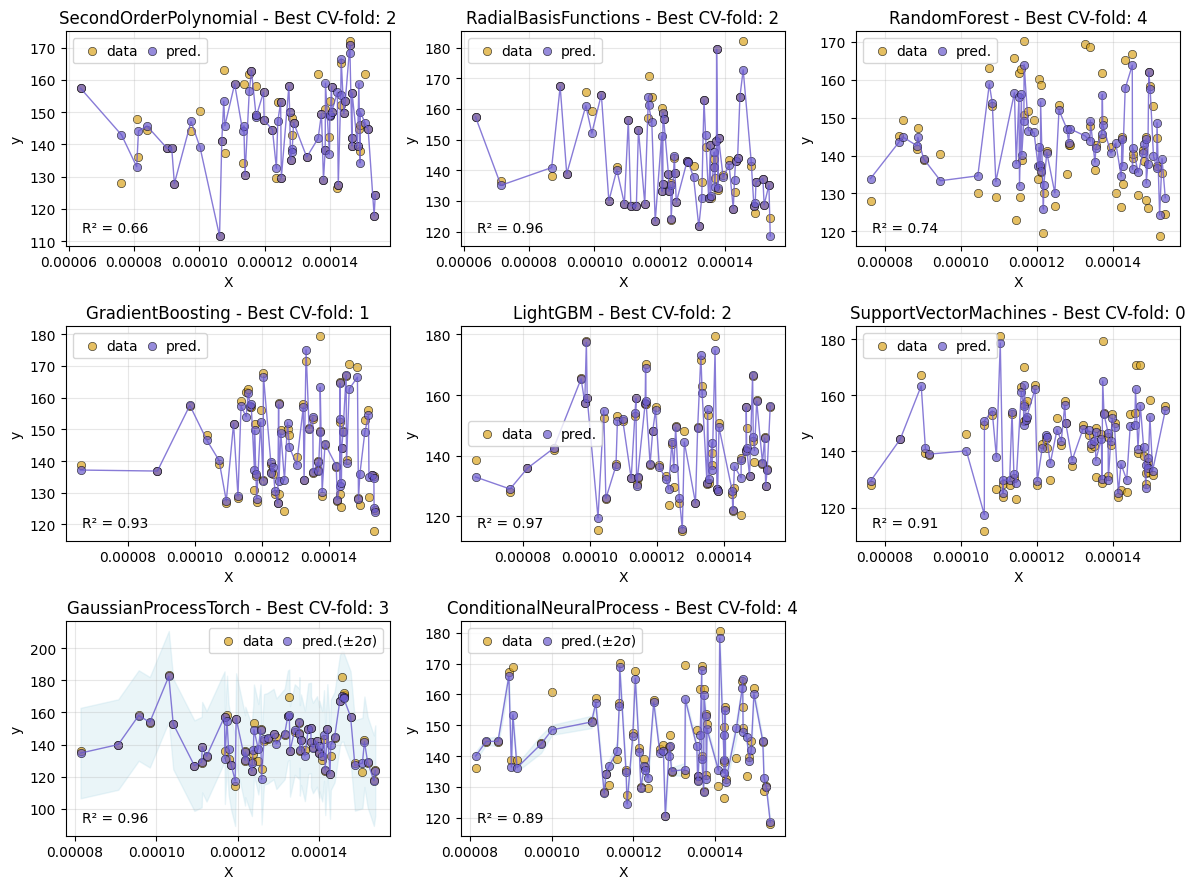

In [179]:
em.plot_results()

# 7. passive mechanics model

In [181]:
X, y = fetch_data('cardiac5')
em = AutoEmulate()
em.setup(X, y, print_setup=False)
em.compare()
em.print_results()

Initializing:   0%|          | 0/8 [00:00<?, ?it/s]

Multiple outputs detected. Plotting the output variable with index 0. 
To plot other outputs, set `output_index` argument to the desired index.


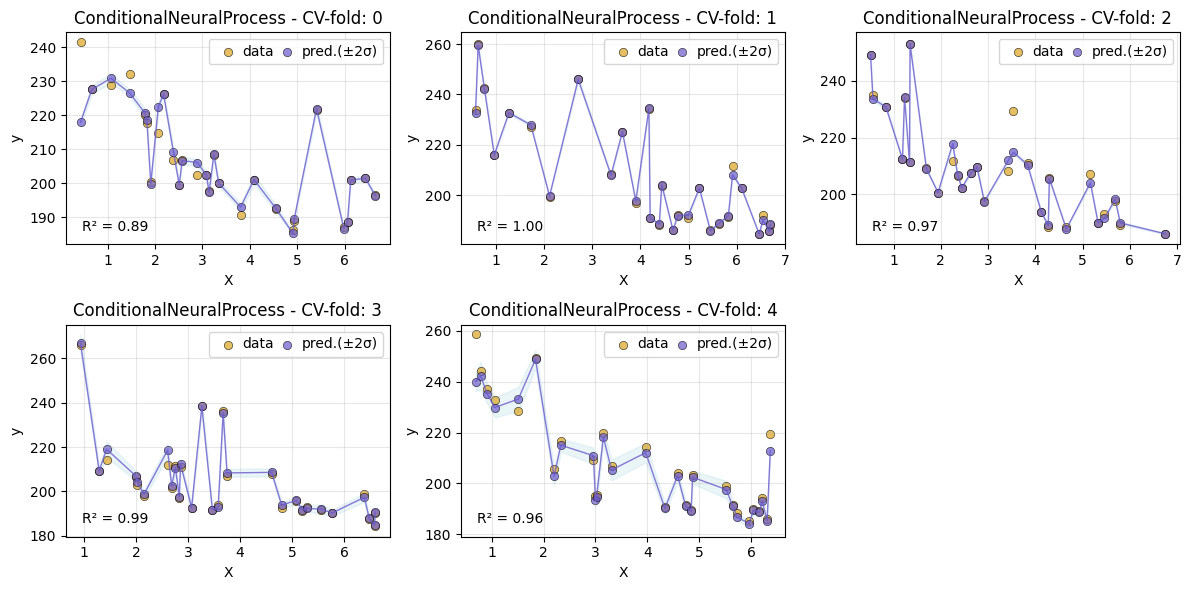

In [186]:
em.plot_results(model="cnp")

# 8. tissue electrophysiology

In [189]:
X, y = fetch_data('cardiac6')
em = AutoEmulate()
em.setup(X, y, print_setup=False)
em.compare()
em.print_results()

Initializing:   0%|          | 0/8 [00:00<?, ?it/s]

Multiple outputs detected. Plotting the output variable with index 0. 
To plot other outputs, set `output_index` argument to the desired index.


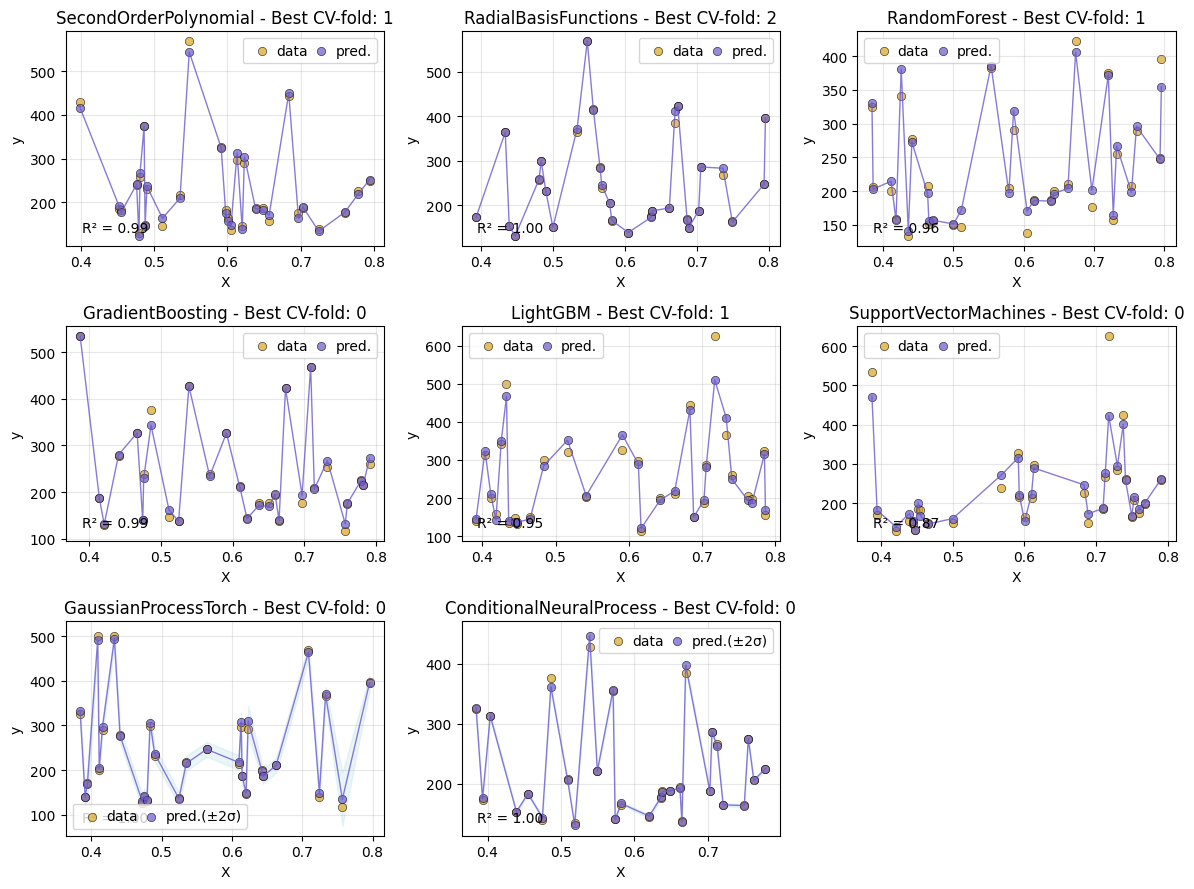

In [190]:
em.plot_results()

In [191]:
# 9. climate model
X, y = fetch_data('climate1')
em = AutoEmulate()
em.setup(X, y, print_setup=False)
em.compare()
em.print_results()

Initializing:   0%|          | 0/8 [00:00<?, ?it/s]

# Ludo's model

In [84]:
import pandas as pd
X = pd.read_csv('parameters.csv')
y = pd.read_csv('outputs.csv')
# first 10 variables in y
y = y.iloc[:, :10]
#y = y[['PCAchest_1_of_9']]
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (2385, 41), y shape: (2385, 10)


In [85]:
em = AutoEmulate()
em.setup(X, y, print_setup=False, n_jobs=4)
em.compare()
em.print_results()

Initializing:   0%|          | 0/8 [00:00<?, ?it/s]

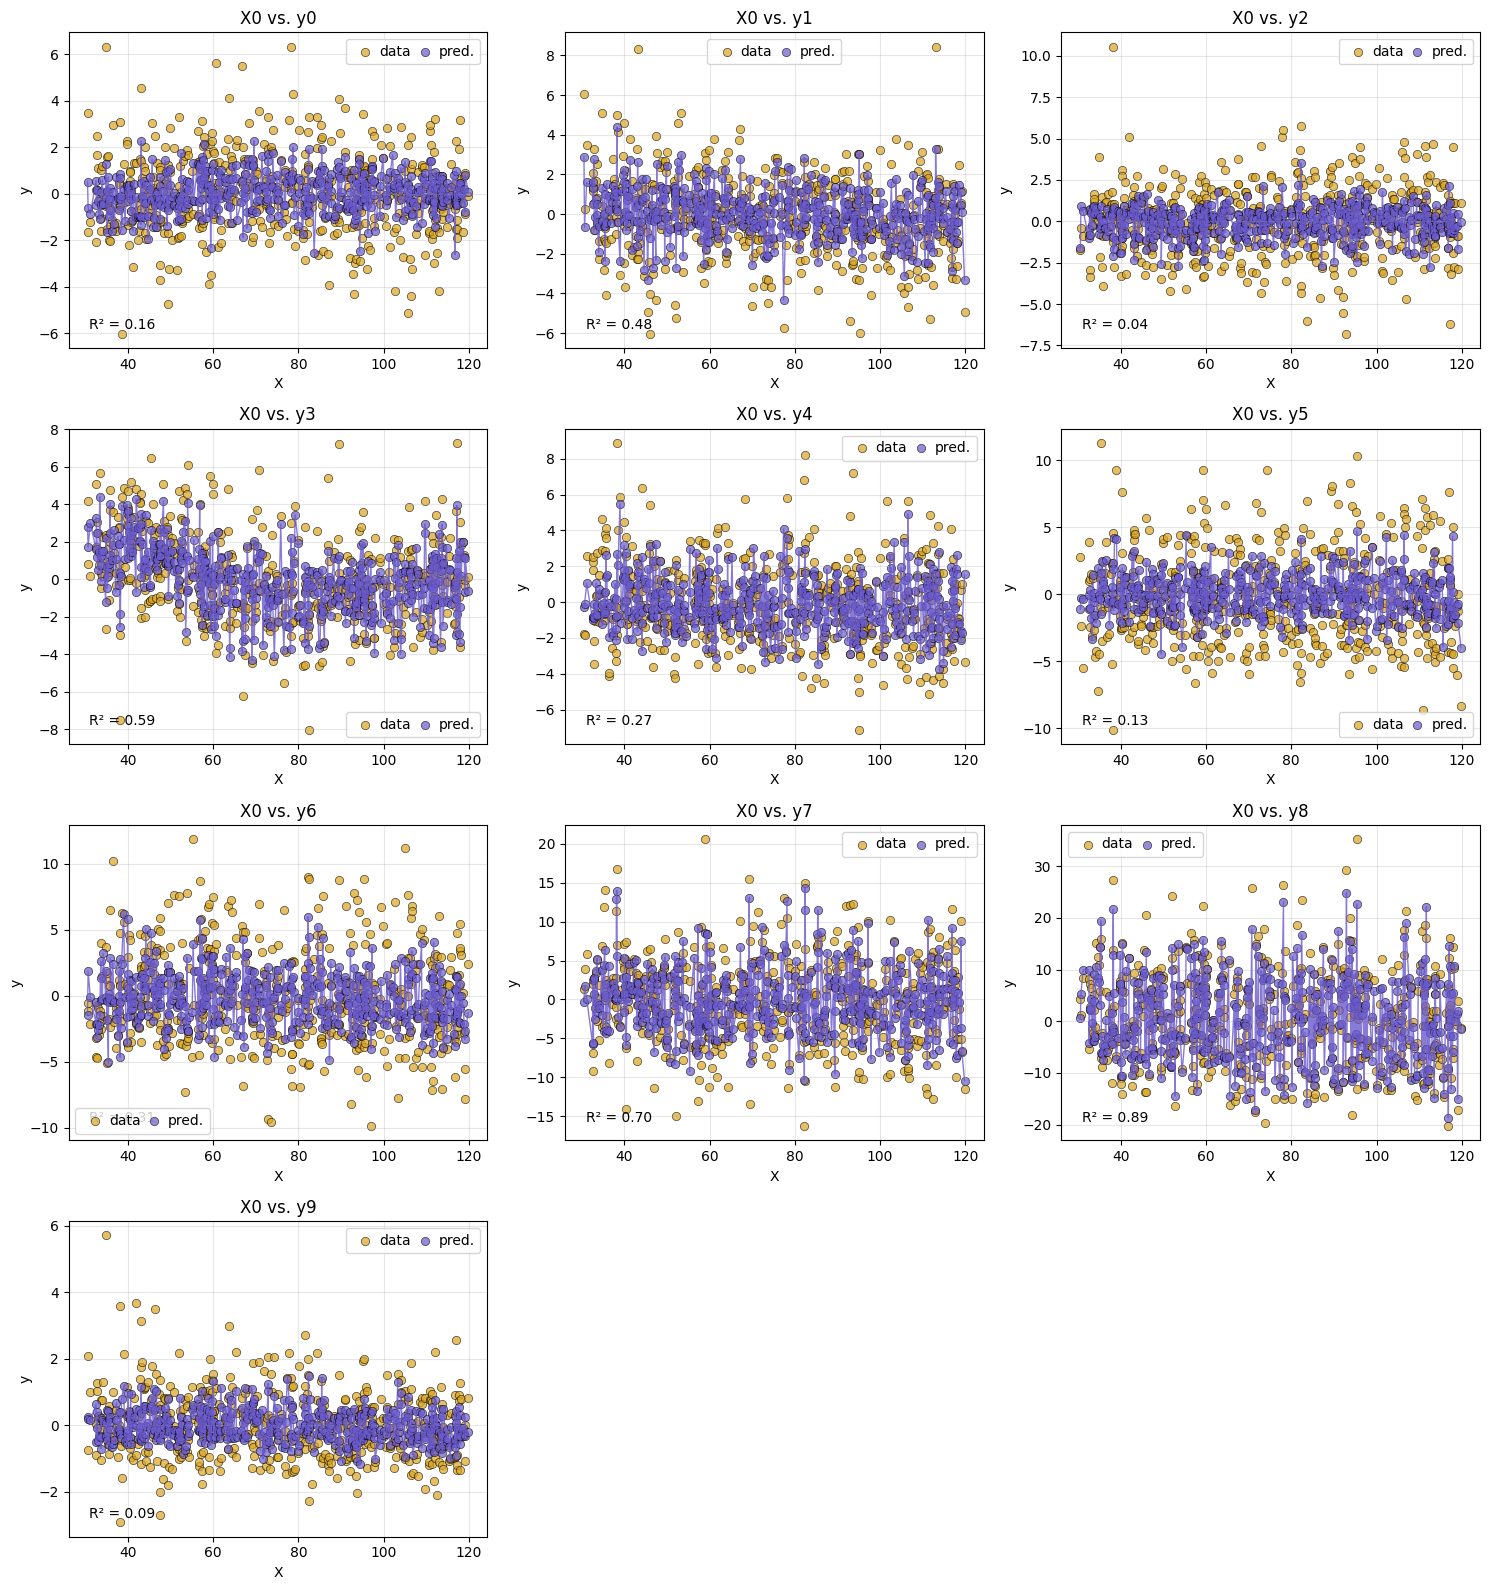

In [94]:
best = em.best_model
best

em.plot_model(best, output_index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Multiple outputs detected. Plotting the output variable with index 3. 
To plot other outputs, set `output_index` argument to the desired index.


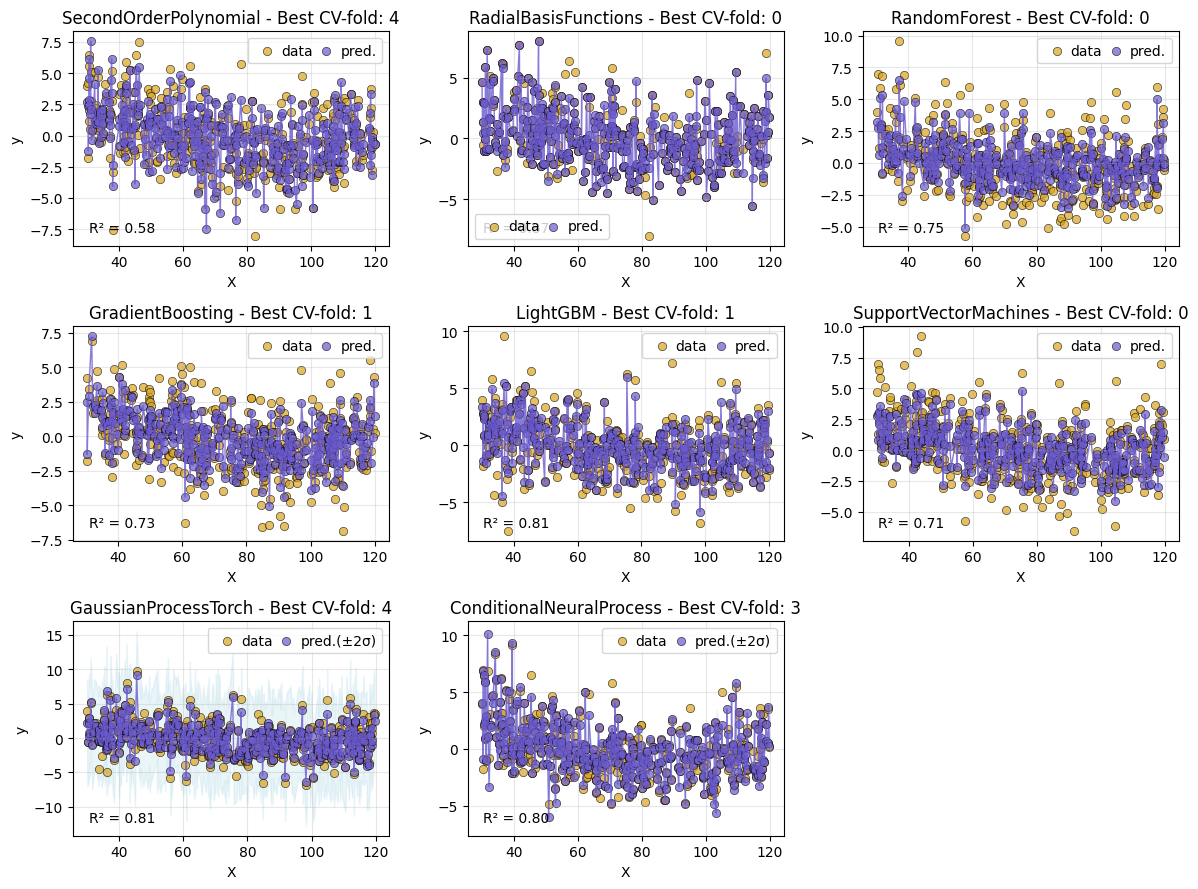

In [90]:
em.plot_results(output_index=3)

In [203]:
lgbm = em.best_model
cnp = em.get_model(name="cnp")
em.evaluate_model(cnp)

model short   rmse     r2
0  ConditionalNeuralProcess   cnp  3.595  0.843